In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
import joblib
import os

from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import joblib

In [ ]:
# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_csv("dataset.csv")
print("First 5 rows:")
display(df.head())


First 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
# -----------------------------
# Step 2: Check missing values
# -----------------------------
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


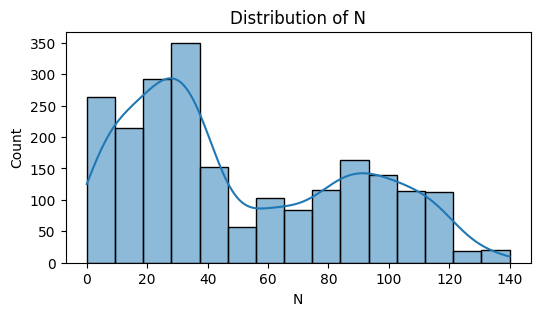

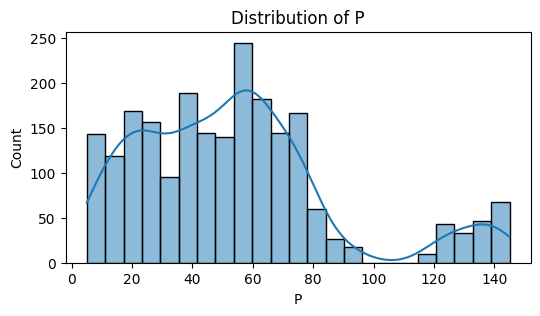

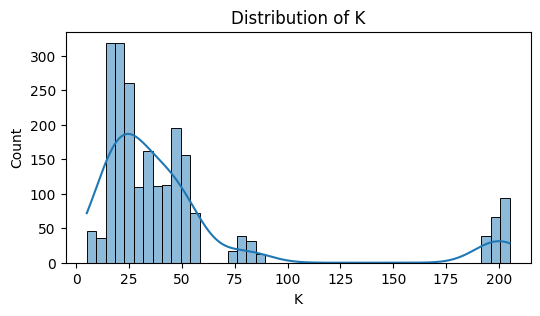

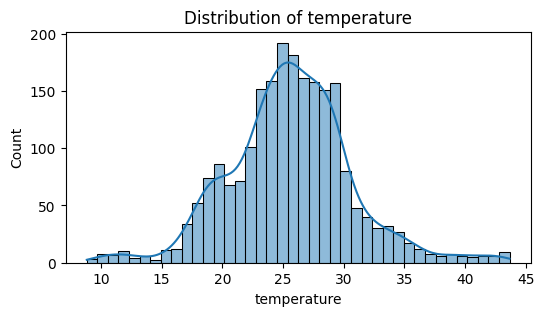

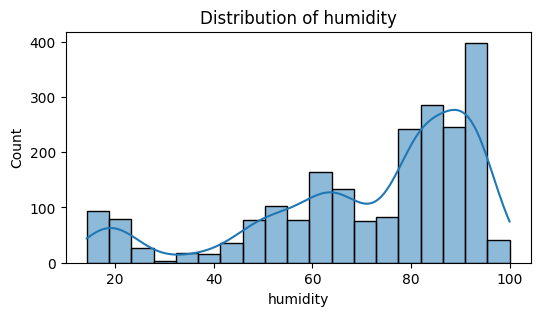

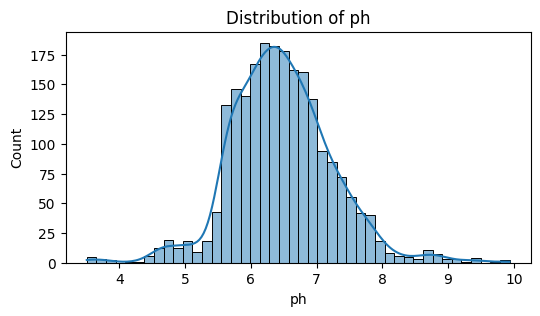

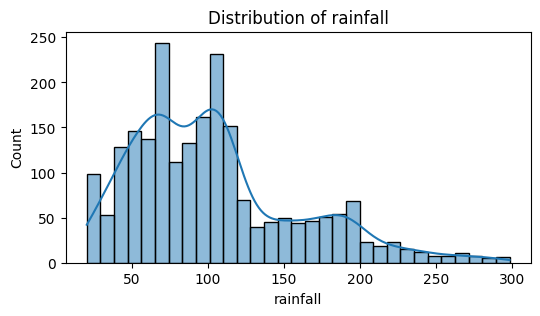

In [ ]:
# -----------------------------
# Step 3: Plot feature distributions
# -----------------------------
features = ["N","P","K","temperature","humidity","ph","rainfall"]
label_col = "label"
for f in features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[f], kde=True)
    plt.title(f"Distribution of {f}")
    plt.show()

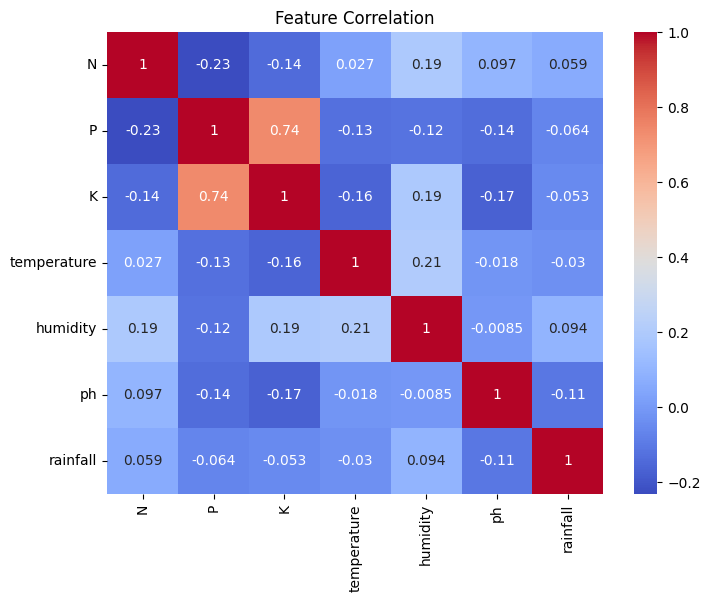

In [ ]:
# -----------------------------
# Step 4: Correlation heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [ ]:
# -----------------------------
# Step 5: Crop-wise statistics
# -----------------------------
label_col = "label"
crops = df[label_col].unique()

for crop in crops:
    print(f"\nStatistics for crop: {crop}")
    display(df[df[label_col]==crop][features].describe())



Statistics for crop: rice


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
std,11.917981,7.904966,2.946167,2.031272,1.418381,0.768692,34.291825
min,60.000000,35.000000,35.000000,20.045414,80.122675,5.005307,182.561632
25%,69.000000,41.000000,38.000000,21.927064,80.952094,5.869992,204.334023
50%,80.000000,47.000000,40.000000,23.734837,82.189357,6.363804,233.119859
75%,91.000000,54.250000,42.000000,25.513702,83.470254,7.039147,264.126903
max,99.000000,60.000000,45.000000,26.929951,84.969072,7.868475,298.560117



Statistics for crop: maize


,N,P,K,temperature,humidity,ph,rainfall
count,100.00000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,77.76000,48.440000,19.7900,22.389204,65.092249,6.245190,84.766988
std,11.94949,8.010498,2.9415,2.679360,5.448699,0.412681,15.547339
min,60.00000,35.000000,15.0000,18.041855,55.282204,5.513698,60.651715
25%,67.75000,42.750000,17.0000,19.822579,60.579884,5.854734,70.384556
50%,76.00000,48.500000,20.0000,22.844456,65.303845,6.259181,83.471553
75%,87.00000,56.000000,22.0000,24.900640,69.431596,6.602366,99.877090
max,100.00000,60.000000,25.0000,26.549864,74.829137,6.995844,109.751538



Statistics for crop: chickpea


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,40.090000,67.790000,79.920000,18.872847,16.860439,7.336957,80.058977
std,12.150649,7.498545,3.261901,1.169838,1.711979,0.801127,7.944350
min,20.000000,55.000000,75.000000,17.024985,14.258040,5.988993,65.113656
25%,30.000000,61.000000,77.000000,17.877953,15.392700,6.603967,73.610409
50%,39.000000,68.000000,79.000000,18.878291,16.658634,7.356537,79.692282
75%,52.000000,74.000000,83.000000,19.711637,18.265986,7.861625,85.824482
max,60.000000,80.000000,85.000000,20.995022,19.969789,8.868741,94.781896



Statistics for crop: kidneybeans


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.750000,67.540000,20.050000,20.115085,21.605357,5.749411,105.919778
std,10.834266,7.571104,3.102215,2.599573,2.167323,0.145220,26.111384
min,0.000000,55.000000,15.000000,15.330426,18.092240,5.502999,60.275525
25%,11.750000,61.000000,17.000000,18.294621,19.735894,5.624995,85.824741
50%,22.000000,67.000000,20.000000,19.924037,21.348735,5.745283,107.399392
75%,28.000000,74.000000,22.250000,22.003187,23.357184,5.868351,129.399964
max,40.000000,80.000000,25.000000,24.923601,24.969699,5.998125,149.744103



Statistics for crop: pigeonpeas


,N,P,K,temperature,humidity,ph,rainfall
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.73000,67.730000,20.290000,27.741762,48.061633,5.794175,149.457564
std,11.84995,7.294463,2.815165,5.715682,10.963659,0.830274,32.986321
min,0.00000,55.000000,15.000000,18.319104,30.400468,4.548202,90.054227
25%,10.00000,61.000000,18.000000,22.866441,38.365278,5.003316,122.345984
50%,20.00000,69.500000,20.000000,28.931707,47.195180,5.690466,154.310507
75%,30.25000,73.250000,23.000000,31.472520,57.004398,6.418984,177.907288
max,40.00000,80.000000,25.000000,36.977944,69.691413,7.445445,198.829881



Statistics for crop: mothbeans


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,21.440000,48.010000,20.23000,28.194920,53.160418,6.831174,51.198487
std,11.343418,7.547151,3.04795,2.209665,6.994600,1.862163,13.750693
min,0.000000,35.000000,15.00000,24.018254,40.009334,3.504752,30.920140
25%,11.000000,42.750000,18.00000,26.427917,46.726630,5.378557,37.985391
50%,22.000000,48.500000,20.00000,28.370863,53.668190,7.219136,51.182738
75%,30.250000,55.000000,23.00000,30.121721,59.436742,8.366003,64.185059
max,40.000000,60.000000,25.00000,31.999286,64.955854,9.935091,74.443307



Statistics for crop: mungbean


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.990000,47.280000,19.870000,28.525775,85.499975,6.723957,48.403601
std,11.510641,7.870261,3.148368,0.841546,2.851356,0.286574,7.117214
min,0.000000,35.000000,15.000000,27.014704,80.034996,6.218924,36.120429
25%,10.000000,40.000000,17.000000,27.878650,83.429575,6.473731,43.103300
50%,22.000000,47.000000,20.000000,28.441673,85.953767,6.703890,49.028171
75%,31.000000,54.250000,22.000000,29.248616,87.832140,6.982101,54.837313
max,40.000000,60.000000,25.000000,29.914544,89.996156,7.199495,59.872321



Statistics for crop: blackgram


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,40.020000,67.470000,19.240000,29.973340,65.118426,7.133952,67.884151
std,12.664258,7.151259,3.188109,2.686357,2.798326,0.372533,4.184186
min,20.000000,55.000000,15.000000,25.097374,60.065349,6.500145,60.417903
25%,28.750000,62.000000,16.750000,27.822763,63.040532,6.812736,64.049755
50%,41.000000,67.000000,19.000000,29.655515,65.026723,7.165240,68.293539
75%,52.000000,74.000000,22.000000,32.379701,67.741171,7.419390,71.397924
max,60.000000,80.000000,25.000000,34.946616,69.961000,7.775306,74.915595



Statistics for crop: lentil


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.770000,68.360000,19.410000,24.509052,64.804785,6.927932,45.680454
std,12.196915,7.335427,2.968164,3.320985,2.935461,0.549266,5.632972
min,0.000000,55.000000,15.000000,18.064861,60.091166,5.916454,35.034848
25%,9.000000,61.750000,17.000000,21.724115,62.493027,6.485182,41.571821
50%,16.500000,68.000000,19.000000,24.946835,64.094626,6.954178,46.553255
75%,29.250000,75.000000,22.000000,27.431229,67.441228,7.394295,49.997992
max,40.000000,80.000000,25.000000,29.944139,69.923759,7.841496,54.939377



Statistics for crop: pomegranate


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.00000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,18.870000,18.75000,40.2100,21.837842,90.125504,6.429172,107.528442
std,12.617652,7.38737,3.0328,2.206355,2.825706,0.491509,2.895339
min,0.000000,5.00000,35.0000,18.071330,85.129122,5.561852,102.518476
25%,8.000000,13.00000,38.0000,19.795742,88.101021,5.968637,104.967353
50%,18.000000,20.00000,40.0000,22.354425,89.911979,6.430715,107.588201
75%,29.250000,25.00000,43.0000,23.885942,92.432950,6.887951,109.958146
max,40.000000,30.00000,45.0000,24.962732,94.998975,7.199504,112.475094



Statistics for crop: banana


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,100.230000,82.010000,50.050000,27.376798,80.358123,5.983893,104.626980
std,11.107241,7.690339,3.382591,1.428359,2.805481,0.270650,9.398150
min,80.000000,70.000000,45.000000,25.010185,75.031933,5.505394,90.109781
25%,92.000000,75.000000,47.000000,26.108408,78.062229,5.740712,96.471109
50%,100.500000,81.000000,50.000000,27.443333,80.223599,5.994462,105.007750
75%,108.250000,88.000000,53.000000,28.657735,82.960240,6.211092,112.092171
max,120.000000,95.000000,55.000000,29.908885,84.978492,6.490074,119.847970



Statistics for crop: mango


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.070000,27.180000,29.920000,31.208770,50.156573,5.766373,94.704515
std,12.329037,7.663873,3.096691,2.653858,2.756285,0.703655,3.338577
min,0.000000,15.000000,25.000000,27.003155,45.022364,4.507524,89.291476
25%,9.000000,19.750000,27.000000,28.912489,47.930584,5.183736,91.612674
50%,21.000000,27.500000,30.000000,31.300223,50.281615,5.743385,94.905973
75%,30.250000,35.000000,32.000000,33.382600,52.482812,6.416573,97.475774
max,40.000000,40.000000,35.000000,35.990097,54.964053,6.967418,100.812466



Statistics for crop: grapes


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,23.180000,132.530000,200.110000,23.849575,81.875228,6.025937,69.611829
std,12.466829,7.619029,3.265662,9.738649,1.177111,0.298265,2.951759
min,0.000000,120.000000,195.000000,8.825675,80.016394,5.510925,65.010953
25%,11.750000,125.750000,197.000000,16.206523,80.859457,5.776854,66.836826
50%,24.000000,133.000000,201.000000,23.018528,81.724647,6.001785,69.536186
75%,35.000000,139.000000,203.000000,30.823648,82.899224,6.313711,71.609366
max,40.000000,145.000000,205.000000,41.948657,83.983517,6.499605,74.915062



Statistics for crop: watermelon


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,99.420000,17.000000,50.220000,25.591767,85.160375,6.495778,50.786219
std,12.565127,7.535773,3.264687,0.850124,2.956603,0.281420,5.867006
min,80.000000,5.000000,45.000000,24.043558,80.026213,6.000976,40.126504
25%,89.000000,10.000000,47.000000,24.899548,83.006364,6.259274,46.063351
50%,99.000000,17.500000,50.500000,25.603965,85.030605,6.469926,50.671903
75%,110.000000,23.000000,53.000000,26.262870,87.644844,6.756902,56.412795
max,120.000000,30.000000,55.000000,26.986037,89.984052,6.956509,59.759800



Statistics for crop: muskmelon


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,100.320000,17.720000,50.080000,28.663066,92.342802,6.358805,24.689952
std,12.176215,7.187363,3.218256,0.861295,1.505117,0.231523,2.773999
min,80.000000,5.000000,45.000000,27.024151,90.015064,6.002927,20.211267
25%,89.000000,12.000000,47.000000,27.959328,90.962363,6.155965,22.067976
50%,100.000000,18.000000,50.000000,28.851775,92.111116,6.353033,24.721512
75%,111.000000,25.000000,52.250000,29.370038,93.793552,6.550222,26.861601
max,120.000000,30.000000,55.000000,29.943492,94.962187,6.781050,29.866814



Statistics for crop: apple


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.800000,134.220000,199.890000,22.630942,92.333383,5.929663,112.654779
std,11.863704,8.139665,3.320871,0.827404,1.458551,0.268932,7.102985
min,0.000000,120.000000,195.000000,21.036527,90.025751,5.514253,100.117344
25%,10.000000,126.750000,197.000000,22.163206,90.970127,5.705800,106.070135
50%,24.000000,136.500000,200.000000,22.628290,92.416541,5.885818,112.979230
75%,30.000000,141.000000,203.000000,23.344066,93.509252,6.135616,118.449546
max,40.000000,145.000000,205.000000,23.996862,94.920481,6.499227,124.983162



Statistics for crop: orange


,N,P,K,temperature,humidity,ph,rainfall
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19.58000,16.550000,10.010000,22.765725,92.170209,7.016957,110.474969
std,11.94193,7.691495,3.056687,7.342535,1.430343,0.576321,5.717125
min,0.00000,5.000000,5.000000,10.010813,90.006217,6.010392,100.173796
25%,9.00000,9.000000,8.000000,17.048910,91.034378,6.484985,106.220011
50%,19.00000,16.000000,10.000000,22.901055,91.963246,7.022614,110.684073
75%,31.00000,23.000000,12.250000,29.550936,93.366338,7.517194,115.565866
max,40.00000,30.000000,15.000000,34.906653,94.964199,7.995849,119.694658



Statistics for crop: papaya


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.880000,59.050000,50.040000,33.723859,92.403388,6.741442,142.627839
std,12.219607,7.057305,3.097474,6.263022,1.420446,0.147351,64.396577
min,31.000000,46.000000,45.000000,23.012402,90.038631,6.501521,40.351531
25%,39.000000,54.000000,47.000000,28.554724,91.169476,6.615907,81.940962
50%,49.000000,60.000000,50.000000,33.262870,92.681086,6.740830,139.000698
75%,59.250000,65.000000,52.000000,39.071806,93.511805,6.839783,202.394057
max,70.000000,70.000000,55.000000,43.675493,94.944821,6.993473,248.859299



Statistics for crop: coconut


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,21.980000,16.930000,30.590000,27.409892,94.844272,5.976562,175.686646
std,11.761931,8.357244,2.998636,1.385734,2.686329,0.287632,29.472333
min,0.000000,5.000000,25.000000,25.008724,90.017345,5.501580,131.090008
25%,13.750000,9.750000,29.000000,26.268718,92.544995,5.731053,149.126478
50%,24.000000,15.500000,31.000000,27.385317,94.960581,5.990709,171.999922
75%,31.000000,24.250000,33.000000,28.600213,96.759684,6.209201,202.351490
max,40.000000,30.000000,35.000000,29.869083,99.981876,6.470466,225.632366



Statistics for crop: cotton


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,117.770000,46.240000,19.56000,23.988958,79.843474,6.912675,80.398043
std,11.628817,7.348634,3.16968,1.135681,3.050955,0.627170,11.231812
min,100.000000,35.000000,15.00000,22.000851,75.005393,5.801048,60.653817
25%,107.750000,40.000000,17.00000,23.017615,77.035008,6.364399,70.894298
50%,117.000000,46.000000,19.00000,23.964997,80.010893,6.840957,80.237095
75%,127.500000,52.000000,22.00000,24.973735,82.364946,7.426792,90.418270
max,140.000000,60.000000,25.00000,25.992374,84.876690,7.994680,99.931008



Statistics for crop: jute


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,78.400000,46.860000,39.990000,24.958376,79.639864,6.732778,174.792798
std,10.968274,7.195706,3.313563,1.185138,5.507798,0.446349,15.078367
min,60.000000,35.000000,35.000000,23.094338,70.882596,6.002525,150.235524
25%,70.000000,41.000000,37.000000,23.886729,74.588266,6.348010,161.090683
50%,78.000000,46.000000,40.000000,24.971106,79.469205,6.711500,175.590814
75%,88.250000,53.250000,43.000000,25.894852,83.232826,7.126526,187.641532
max,100.000000,60.000000,45.000000,26.985822,89.891065,7.488014,199.836291



Statistics for crop: coffee


,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,101.200000,28.740000,29.940000,25.540477,58.869846,6.790308,158.066295
std,12.345203,7.276113,3.246817,1.502635,5.838566,0.417132,25.695086
min,80.000000,15.000000,25.000000,23.059519,50.045570,6.020947,115.156401
25%,89.000000,23.000000,27.000000,24.218563,53.814433,6.429728,136.011746
50%,103.000000,29.000000,30.000000,25.656643,57.648083,6.798626,157.770963
75%,112.000000,34.250000,33.000000,26.744956,63.579586,7.132105,181.472018
max,120.000000,40.000000,35.000000,27.923744,69.948073,7.493192,199.473564


In [ ]:
# -----------------------------
# Step 6: Compute GUI input ranges (dynamic)
# -----------------------------
gui_ranges = {}
for f in features:
    f_min = df[f].min()
    f_max = df[f].max()
    buffer = (f_max - f_min) * 0.05  # optional 5% buffer
    gui_ranges[f] = (round(f_min - buffer, 2), round(f_max + buffer, 2))

print("\nDynamic GUI input ranges (with 5% buffer):")
for f, r in gui_ranges.items():
    print(f"{f}: {r[0]} – {r[1]}")


Dynamic GUI input ranges (with 5% buffer):
N: -7.0 – 147.0
P: -2.0 – 152.0
K: -5.0 – 215.0
temperature: 7.08 – 45.42
humidity: 9.97 – 104.27
ph: 3.18 – 10.26
rainfall: 6.29 – 312.48


In [ ]:
# -----------------------------
# Step 7: Create folder to store models
# -----------------------------
model_folder = "trained_models"
if not os.path.exists(model_folder):
    os.makedirs(model_folder)
print(f"\nAll models will be saved in folder: {model_folder}")


All models will be saved in folder: trained_models


In [ ]:
# -----------------------------
# Step 8: Train, Test, Compare, Save
# -----------------------------
crops = df[label_col].unique()
results_summary = []

for crop in crops:
    print(f"\n=== Processing crop: {crop} ===")
    
    # Filter data for this crop
    crop_data = df[df[label_col]==crop][features]
    
    # Split into train/test (80/20)
    X_train, X_test = train_test_split(crop_data, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train One-Class SVM
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # nu can be tuned
    oc_svm.fit(X_train_scaled)
    
    # Test predictions
    y_pred = oc_svm.predict(X_test_scaled)  # 1 = inlier, -1 = outlier
    decision_scores = oc_svm.decision_function(X_train_scaled)
    
    # Normalize decision scores to 0-100% survival probability
    scores_min = decision_scores.min()
    scores_max = decision_scores.max()
    survival_percent = ((decision_scores - scores_min) / (scores_max - scores_min)) * 100
    
    # Summarize results
    test_summary = pd.DataFrame(X_test, copy=True)
    test_summary["prediction"] = y_pred
    test_summary["survival_%"] = survival_percent
    display(test_summary.head())
    
    # Save model and scaler
    scaler_path = os.path.join(model_folder, f"{crop}_scaler.pkl")
    model_path = os.path.join(model_folder, f"{crop}_ocsvm.pkl")
    joblib.dump(scaler, scaler_path)
    joblib.dump(oc_svm, model_path)
    
    print(f"Saved scaler → {scaler_path}")
    print(f"Saved model → {model_path}")
    
    # Store summary metrics
    inlier_count = sum(y_pred == 1)
    outlier_count = sum(y_pred == -1)
    avg_survival = survival_percent.mean()
    results_summary.append({
        "crop": crop,
        "inliers": inlier_count,
        "outliers": outlier_count,
        "avg_survival_%": round(avg_survival, 2)
    })


=== Processing crop: rice ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
83,67,43,39,26.043720,84.969072,5.999969,186.753677,-1,52.055879
53,65,60,43,21.971994,81.899182,5.658169,227.363701,1,62.845315
70,61,52,41,24.976695,83.891805,6.880431,204.800185,1,76.026801
45,91,35,38,24.897282,80.525861,6.134287,183.679321,-1,46.875154
44,85,52,45,26.313555,82.366990,7.224286,265.535594,1,84.486934


Saved scaler → trained_models\rice_scaler.pkl
Saved model → trained_models\rice_ocsvm.pkl

=== Processing crop: maize ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
183,71,52,18,25.107874,55.977328,5.790770,78.160777,1,45.109334
153,60,38,17,18.419330,64.235803,6.474477,76.413124,-1,13.537495
170,99,39,18,19.201294,68.305790,6.112751,87.850924,1,74.851865
145,96,46,22,20.583140,69.001286,6.499936,66.293904,1,64.601634
144,69,51,23,22.217382,72.854628,6.801639,106.621316,-1,35.285507


Saved scaler → trained_models\maize_scaler.pkl
Saved model → trained_models\maize_ocsvm.pkl

=== Processing crop: chickpea ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
283,53,73,77,19.713597,18.096657,7.325451,73.644765,1,73.624904
253,29,77,75,17.503611,15.480832,7.778592,72.944667,1,52.466920
270,42,74,83,19.258256,14.280419,7.545258,65.780420,1,52.458295
245,35,64,78,17.928459,14.273280,7.496645,85.373788,1,78.870063
244,35,66,81,19.371011,15.774581,6.138244,85.248199,1,100.000000


Saved scaler → trained_models\chickpea_scaler.pkl
Saved model → trained_models\chickpea_ocsvm.pkl

=== Processing crop: kidneybeans ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
383,14,59,15,21.351357,22.912449,5.779090,146.454865,1,80.175318
353,3,77,25,24.849062,22.894646,5.608165,62.212922,-1,0.000000
370,37,56,25,22.055923,19.603793,5.774755,126.726537,-1,27.227244
345,17,77,24,20.769522,18.931469,5.568457,109.019371,-1,58.243591
344,27,56,22,19.918531,20.700998,5.833011,108.643454,1,100.000000


Saved scaler → trained_models\kidneybeans_scaler.pkl
Saved model → trained_models\kidneybeans_ocsvm.pkl

=== Processing crop: pigeonpeas ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
483,39,57,19,29.323796,45.932484,6.421748,165.411337,1,80.459987
453,5,55,18,33.508764,45.709761,7.322098,126.673812,-1,28.244389
470,3,60,19,25.746794,40.719259,4.820788,100.779163,1,50.720810
445,23,75,25,31.075090,47.198477,7.077170,91.312564,-1,29.756981
444,16,73,19,18.416456,34.805410,4.684079,163.274747,1,57.662510


Saved scaler → trained_models\pigeonpeas_scaler.pkl
Saved model → trained_models\pigeonpeas_ocsvm.pkl

=== Processing crop: mothbeans ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
583,29,41,21,31.493981,62.849169,8.869797,64.568076,-1,20.429480
553,39,36,22,29.343174,60.503209,9.072011,34.033355,-1,3.506965
570,23,58,19,24.170932,58.252046,5.243635,59.189534,-1,24.929728
545,29,44,20,30.041323,63.562230,8.620108,31.831924,-1,29.052222
544,32,48,18,26.457078,56.402263,5.993514,64.161677,1,79.346019


Saved scaler → trained_models\mothbeans_scaler.pkl
Saved model → trained_models\mothbeans_ocsvm.pkl

=== Processing crop: mungbean ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
683,24,44,17,29.859691,80.034996,6.666381,50.664875,-1,19.958274
653,21,44,18,27.069100,86.899341,7.128511,50.467461,1,53.087208
670,20,41,20,29.273086,89.487502,7.073048,50.924655,1,73.012800
645,2,39,15,28.072196,82.911647,6.478557,49.618653,-1,14.631111
644,20,45,22,29.588816,89.993969,6.904587,54.961213,1,56.887148


Saved scaler → trained_models\mungbean_scaler.pkl
Saved model → trained_models\mungbean_ocsvm.pkl

=== Processing crop: blackgram ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
783,58,79,17,27.247665,66.101231,7.041741,62.318421,-1,11.259269
753,33,75,21,33.046880,68.938756,6.690655,62.302783,1,26.632254
770,37,62,17,25.685767,69.843540,7.121255,74.620687,-1,10.783207
745,34,80,19,31.493383,63.056365,6.521218,71.483270,1,36.535567
744,50,64,25,28.840792,63.372307,6.734447,70.254967,1,67.912169


Saved scaler → trained_models\blackgram_scaler.pkl
Saved model → trained_models\blackgram_ocsvm.pkl

=== Processing crop: lentil ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
883,14,76,20,29.059412,62.106524,7.042475,36.501137,1,42.061693
853,32,79,22,27.601955,63.461707,5.916454,54.378142,-1,8.348963
870,26,66,22,18.064861,65.103435,6.300479,51.549228,-1,30.166678
845,24,61,17,22.637142,65.445449,6.233269,38.304111,1,53.603092
844,22,55,16,23.793715,68.032092,6.516318,49.739221,-1,28.479243


Saved scaler → trained_models\lentil_scaler.pkl
Saved model → trained_models\lentil_ocsvm.pkl

=== Processing crop: pomegranate ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
983,18,9,40,19.446231,89.021270,5.627186,106.160683,1,40.815550
953,13,7,43,18.202304,91.122822,7.013482,109.662397,-1,25.971626
970,34,9,36,22.812265,86.342338,6.276039,110.443229,-1,19.462698
945,9,25,41,24.815301,91.908430,5.972715,109.285342,1,60.436015
944,37,11,36,24.247796,85.560333,6.710143,106.921603,-1,14.038770


Saved scaler → trained_models\pomegranate_scaler.pkl
Saved model → trained_models\pomegranate_ocsvm.pkl

=== Processing crop: banana ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1083,95,88,52,28.003160,78.900860,6.235462,94.681803,1,86.002454
1053,93,81,50,27.718225,76.578532,6.036079,102.209984,1,100.000000
1070,108,72,46,25.162782,84.978492,6.110845,90.945546,-1,11.417337
1045,82,78,46,25.058022,84.973237,5.738679,110.440880,-1,0.000000
1044,109,91,53,29.667273,83.510142,6.010096,110.251110,-1,36.528661


Saved scaler → trained_models\banana_scaler.pkl
Saved model → trained_models\banana_ocsvm.pkl

=== Processing crop: mango ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1183,7,28,35,30.020862,46.783938,4.669108,96.637210,-1,18.284275
1153,23,23,30,32.821411,47.455538,4.755274,90.891731,1,74.678044
1170,18,20,26,31.665247,51.985946,5.435841,89.980243,1,71.924485
1145,34,34,35,27.274332,47.168081,6.422711,95.257992,-1,7.651995
1144,31,29,26,28.223734,47.405191,5.024125,97.768323,1,55.064655


Saved scaler → trained_models\mango_scaler.pkl
Saved model → trained_models\mango_ocsvm.pkl

=== Processing crop: grapes ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1283,39,140,203,21.119036,80.633992,6.349876,69.277798,1,60.708876
1253,8,139,199,29.369477,81.539964,6.336427,66.134428,1,74.164240
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,-1,20.491270
1245,31,136,197,31.110473,83.340110,5.653776,71.430016,1,62.086306
1244,19,123,200,34.760861,81.035448,6.167014,65.704300,1,54.409125


Saved scaler → trained_models\grapes_scaler.pkl
Saved model → trained_models\grapes_ocsvm.pkl

=== Processing crop: watermelon ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1383,114,21,55,25.443839,87.939231,6.472756,57.515497,1,73.158287
1353,82,23,49,26.813836,87.219869,6.873284,51.704978,1,58.791189
1370,97,22,50,26.260287,86.145859,6.769894,58.978788,1,100.000000
1345,101,20,48,24.677416,82.754114,6.206247,57.057094,1,68.059252
1344,103,16,49,24.067315,81.640753,6.915717,51.752124,1,54.077368


Saved scaler → trained_models\watermelon_scaler.pkl
Saved model → trained_models\watermelon_ocsvm.pkl

=== Processing crop: muskmelon ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1483,83,15,49,28.927059,91.393568,6.438008,23.200767,1,91.995807
1453,93,22,48,29.125337,91.522911,6.776988,21.904404,1,49.799806
1470,115,12,52,27.514922,94.962187,6.685553,21.017964,-1,11.927588
1445,99,12,52,28.697083,94.307599,6.002927,22.218071,1,59.321599
1444,106,10,49,27.726531,92.006875,6.350624,20.211267,1,58.883223


Saved scaler → trained_models\muskmelon_scaler.pkl
Saved model → trained_models\muskmelon_ocsvm.pkl

=== Processing crop: apple ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1583,38,135,203,23.761218,93.661643,5.965551,100.825956,-1,7.203329
1553,28,136,200,23.062044,92.395441,6.245859,114.739910,1,100.000000
1570,15,123,204,22.527093,92.547804,6.365973,115.383007,1,37.966696
1545,15,133,199,23.996862,91.610017,5.824779,117.610292,1,69.952732
1544,2,123,205,22.366293,90.785725,5.739652,124.983162,-1,8.568751


Saved scaler → trained_models\apple_scaler.pkl
Saved model → trained_models\apple_ocsvm.pkl

=== Processing crop: orange ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1683,24,30,11,32.395240,94.517685,6.601396,113.253730,1,37.918105
1653,14,22,9,17.249446,91.137728,6.543192,112.509052,1,100.000000
1670,31,5,14,17.665454,91.698659,6.583412,110.685751,1,38.764026
1645,40,22,6,24.536101,91.909972,6.488221,115.978799,-1,30.705482
1644,40,21,8,34.906653,92.878201,7.418762,102.190633,-1,22.868424


Saved scaler → trained_models\orange_scaler.pkl
Saved model → trained_models\orange_ocsvm.pkl

=== Processing crop: papaya ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1783,39,69,53,25.930038,93.023578,6.964955,241.820208,-1,5.497392
1753,49,54,50,25.624466,93.182403,6.762522,97.263367,1,80.613909
1770,69,67,52,27.719490,94.438771,6.827306,82.830611,1,47.098877
1745,42,60,47,33.468737,92.127462,6.834808,136.827704,1,100.000000
1744,60,58,51,42.072138,92.922031,6.840802,165.741297,1,84.322832


Saved scaler → trained_models\papaya_scaler.pkl
Saved model → trained_models\papaya_ocsvm.pkl

=== Processing crop: coconut ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1883,17,29,26,26.141621,93.284153,6.071897,195.411503,1,49.974589
1853,24,27,34,28.878630,95.113203,6.203377,145.058312,1,30.837799
1870,26,18,27,27.459078,92.907365,5.836075,142.143000,1,93.795022
1845,39,7,29,27.542732,94.590861,6.362544,150.201214,1,44.737594
1844,28,10,30,29.869083,91.147234,6.305741,192.767857,-1,13.538988


Saved scaler → trained_models\coconut_scaler.pkl
Saved model → trained_models\coconut_ocsvm.pkl

=== Processing crop: cotton ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
1983,116,56,17,24.712525,77.729311,7.979090,85.249633,1,63.660824
1953,107,36,21,25.292501,75.666533,6.205264,62.641742,-1,23.248922
1970,132,52,19,24.164023,76.743390,6.436692,61.946261,1,47.026560
1945,110,39,25,22.606121,77.342640,7.208795,75.136172,1,43.141436
1944,127,37,18,24.876637,76.300504,7.041066,91.922347,1,57.379183


Saved scaler → trained_models\cotton_scaler.pkl
Saved model → trained_models\cotton_ocsvm.pkl

=== Processing crop: jute ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
2083,90,50,44,26.916437,73.486560,6.253409,171.471638,-1,23.838188
2053,100,58,41,23.174033,87.882553,6.658770,160.621734,-1,0.000000
2070,61,41,35,24.971787,79.475579,6.842966,195.757162,1,41.334399
2045,75,41,35,24.970426,78.626977,6.856833,166.641525,1,96.030162
2044,94,37,41,24.763452,87.060711,6.463539,179.163086,1,40.301488


Saved scaler → trained_models\jute_scaler.pkl
Saved model → trained_models\jute_ocsvm.pkl

=== Processing crop: coffee ===


,N,P,K,temperature,humidity,ph,rainfall,prediction,survival_%
2183,93,26,27,24.592457,56.468296,7.288212,137.704405,1,97.657187
2153,120,20,34,23.569605,50.563397,6.906125,130.379712,-1,0.000000
2170,114,20,26,25.556567,62.670878,7.279057,193.586623,1,46.352548
2145,113,15,29,27.096172,63.553243,6.779230,190.244057,1,44.226450
2144,87,23,28,26.223674,62.265946,6.979591,193.746197,1,92.789260


Saved scaler → trained_models\coffee_scaler.pkl
Saved model → trained_models\coffee_ocsvm.pkl


In [ ]:
# -----------------------------
# Step 6: Overall summary
# -----------------------------
summary_df = pd.DataFrame(results_summary)
print("\n=== Overall Model Summary ===")
display(summary_df)


=== Overall Model Summary ===


,crop,inliers,outliers,avg_survival_%
0,rice,10,10,57.36
1,maize,12,8,50.15
2,chickpea,12,8,53.43
3,kidneybeans,14,6,67.99
4,pigeonpeas,12,8,51.27
5,mothbeans,11,9,44.74
6,mungbean,13,7,45.47
7,blackgram,14,6,43.56
8,lentil,9,11,40.19
9,pomegranate,10,10,38.89
